![data-x](https://raw.githubusercontent.com/afo/data-x-plaksha/master/imgsource/dx_logo.png)

---

# Data-X: Introduction to Neural Networks and Keras

<br>


**Author List (in no particular order):** [Wenxi (Ariel) Li](https://www.linkedin.com/in/wenxi-li/), [Elias Castro Hernandez](https://www.linkedin.com/in/ehcastroh/), [Debbie Yuen](http://www.debbiecyuen.me/), [Alexander Fred Ojala](https://www.linkedin.com/in/alexanderfo/), and [Ikhlaq Sidhu](https://ikhlaq-sidhu.com/) 

**Video Walkthrough:** To view walkthrough of this notebook, click [here](https://youtu.be/XNycXuDW2mg)

**References and Additional Resources:** See end of this notebook for additional information related to TensorFlow and Keras.

**License Agreement:** Feel free to do whatever you want with this code

___

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="nn_thumbnail-01.png" align="center" width="40%" padding="10"><br>
    <br>
    
</div>

<br>

This notebook covers the training of two neural networks on readily available data (with an optional third model in the **References and Additional Resources** section). They are intended to provide users with an overview of [Keras](https://keras.io/) and introduce the process of building neural networks using python. These tutorials use `tf.keras`. Keras is [TensorFlow](https://www.tensorflow.org/)'s high-level Python API for building and training deep learning models. To learn more about using Keras with TensorFlow, or TensorFlow's 2.x integrated Keras functionality, see the TensorFlow Keras Guide.


<br>


<strong style="color:red">KEY CONSIDERATION:</strong> Some of the following content may be written for machines running on Linux or Mac operating systems. If you are working on a Windows machine, you will need to enable the Linux Bash Shell, or adjust Shell commands to PowerShell syntax. A tutorial on how to enable the Linux Bash Shell on Windows 10 can be found [here](https://youtu.be/xzgwDbe7foQ).

___

<br>

**Setup Environment**

In [1]:
# Pyton 2 and 3 support
from __future__ import division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/ehch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

<br>

**Install TensorFlow:** the following will install TensorFlow using bash. It serves our purposes. However, for detailed installation instructions see the **Additional Resources** section at the end of this notebook.

In [2]:
## Create Virtual Environment ##
! python3 -m venv ./venv

In [3]:
## Activate Virtual Environment ##
! . ./venv/bin/activate

In [13]:
## Ensure pip version >= 19.0 ##
! pip install --upgrade pip 

Requirement already up-to-date: pip in /home/ehch/anaconda3/lib/python3.6/site-packages (20.2.1)


In [ ]:
## Ensure TF version >= 2.0 ##
! pip install --upgrade tensorflow

<br>

**Import deep learning libriaries**

In [4]:
# for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

# Check that Eager Execution is active
tf.executing_eagerly()

2.3.0


True

___

**Note:** If ```import tensorflow as tf``` doesn't work, TensorFlow is not installed correctly. To resolve the issue see [build and install error messages](https://www.tensorflow.org/install/errors)
    
___

<br>

## Why Keras

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="keras_logo.png" align="center" width="15%" padding="0px"><br>
    <br>
</div>

<br>

[Keras](https://keras.io/) is a modular, powerful and intuitive Deep Learning python library built on TensorFlow, CNTK, Theano. It is such a good wrapper, that the fine folks at Google decided to prepackage Keras with the release of TensorFlow V.2. So benefits of using Keras:
> * Minimalist, user-friendly interface<br>
> * Modular<br>
> * Deep integration with Tensorflow (`tf.keras`)<br>
> * Works on CPUs and GPUs<br>
> * Open-source, developed and maintained by a community of contributors, and publicly hosted on github<br>
> * Extremely well documented, lots of working examples: https://keras.io/<br>
> * Very shallow learning curve —> it is by far one of the best tools for experimenting, both for beginners and experts<br>
> * Easy to extend
___

<br>

**Load TensorBoard and Associated Libraries**

In [5]:
## Load TensorBoard notebook extension ##
%reload_ext tensorboard

In [6]:
## Load additional libraries needed ##
from datetime import datetime
from IPython.display import clear_output, Image, display, HTML
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

<br>

**Clear TensorBoard Logs**

In [7]:
## Clear any logs from previous runs ##
!rm -rf ./logs/

___

<br>

## Case 1: Image Classification on Iris Dataset

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="iris_illustration-13.png" align="center" width="40%" padding="10px"><br>
</div>

<br>


The Iris classification problem is one of the "Hello World" exercises in machine learning -- that is, we will classify iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal). However its ubiquity should not seen as a signal of irrelevance.  On the contrary, there are some researchers working with state-of-the-art deep learning models, and essentially expanding on the ideas covered in Case 1, in their efforts to [reduce the use of pesticide and promote traits via crop selection](https://www.nature.com/articles/s41598-018-38343-3) -- all using machine learning.

<br>

#### **Data Preprocessing**

___

In [8]:
from sklearn import datasets
data = datasets.load_iris()

print(data.DESCR[:980])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== =====


___

**Note:** we are using `skelearn.datasets` to load the popular iris data set. To learn more about the module, or the object type --Bunch-- it returns, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).
___


In [9]:
#sanity check
type(data)

sklearn.utils.Bunch

<br>

**Separate feature data from target data**

In [10]:
# features
x = data['data']
# label
y = data['target']

# sanity check
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# explore feature data
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

<br>

**Data visualization: Scatter plot with selection histogram using [Altair](https://altair-viz.github.io/index.html) (Optional)**

In [12]:
# grammar of graphics plotting lib
import altair as alt

In [13]:
# convert Bunch to DataFrame for easier plotting using numpy and pandas
df = pd.DataFrame(data = np.c_[data['data'], data['target']],
                  columns = data['feature_names'] + ['target'])

In [14]:
# sanity check
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [15]:
# create selection brush (Interactive visualization selection event)
brush = alt.selection(type='interval')

In [16]:
# plot multifeature scatterplot and histogram
scatter = alt.Chart(df).mark_circle().encode(
    alt.X('sepal length (cm)', scale=alt.Scale(zero=False)),
    alt.Y('sepal width (cm)', scale=alt.Scale(zero=False, padding=1)),
    size='sepal width (cm)',
    color=alt.condition(brush, 'target:N', alt.value('lightgray'))
).add_selection(
    brush
)

hbars = alt.Chart(df).mark_bar().encode(
    y='target:N',
    color='target:N',
    x='count(target):Q'
).transform_filter(
    brush
)

In [17]:
# display linked scatter and horizontal plot
### USER: select section of interest 
scatter & hbars

alt.VConcatChart(...)

<br>

**Convert numerical classes to one-hot encoding**

In [18]:
# one hot encode y
import pandas as pd

y = pd.get_dummies(y).values
y[:5,:]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

___

**Note:** [One-hot Encoding](https://en.wikipedia.org/wiki/One-hot) is a widespread approach for dealing with categorial variables containing a few distinct values -- e.g. less than 15. This is because one-hot encoding creates for each unique categorical value within a feature it's very own new binary column. This new column yields all entries of 0s unless it is the unique value.  For more info see `pd.get_dummies( )`, [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html). 
___

<br>

**Split Training and Testing Data**

In [19]:
# train test split, plus randomize
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, test_size=0.4,
                                                    random_state=1337,
                                                   shuffle=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(90, 4)
(90, 3)
(60, 4)


<br>

#### **The Sequential model**

___


The simplest model in Keras is the [Sequential model](https://keras.io/guides/sequential_model/), which is a linear stack of layers. In Keras, you assemble layers to build models. A model is (usually) a graph of layers. The most common type of model is a stack of layers: that is, the `tf.keras.Sequential` model. 

<br>

**KEY TAKEAWAYS:**

1) **Sequential model** - Allows us to build NNs like legos, by adding one layer on top of the other, and swapping layers.<br>
2) Core data structure in Keras is a model -- a model is an object in which we organize layers.<br>
2) A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.<br>
3) A Sequential model is not appropriate when:<br> 
> 1. Your model has multiple inputs or multiple outputs.<br>
> 2. Any of your layers has multiple inputs or multiple outputs.<br>
> 3. Your model requires layer sharing.<br>
> 4. You want to model non-linear topology (e.g. a residual connection, a multi-branch model).

___

<br>

**Definition Phase**

In [20]:
# model initialization
from tensorflow.keras.models import Sequential

# instantiate empty Sequential model
model = Sequential() 

___

**Specifying the Input Shape**

In generaly, we can import layer classes and stack layers (in an NN model for example), by using `.add()`. Model needs to know what input shape it should expect. For this reason, the first layer in a  Sequential model needs to receive information about its input shape.

<br>

The following snippets are strictly equivalent:
> * `model.add(Dense(32, input_shape=(784,)))`
> * `model.add(Dense(32, input_dim=784))`

___

<br>

**Construction Phase**

In [21]:
# model contruction (architecture build computational graph)
from tensorflow.keras.layers import Dense

model.add(Dense(units=64, activation='relu', \
                 input_shape=(4,) ))

model.add(Dense(units=3, activation='softmax') )

___

**Specifying the Learning Process**

Before training a model, you need to configure the learning process, which is done via the [compile method](https://keras.io/api/models/model_training_apis/) -- `.compile()`. 

`.compile` receives at least the following three arguments:

> 1) A [**loss**](https://keras.io/api/losses/) function - This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as `categorical_crossentropy` or `mse`), or it can be an objective function.<br>
> 2) An [**optimizer**](https://keras.io/api/optimizers/) - This could be the string identifier of an existing optimizer (such as `rmsprop`, `gradientdescent`, or `adam`), or an instance of the Optimizer class.<br>
> 3) A list of [**metrics**](https://keras.io/api/metrics/) (optional) -  For any classification problem you will want to set this to `metrics=['accuracy']`. A metric could be the string identifier of an existing metric or a custom metric function.


<br>

**Note:** We can also specify our own optimizer or loss function (even build it ourselves)

```python
# building our own optimizer with SGD
from tensorflow.keras.optimizers import SGD

model.compile(loss = 'categorical_crossentropy',
             optimizer = SGD(lr=0.001, momentum = 0.9, nesterov=True),
             metrics = ['accuracy'])
```

<br>

>**Different Optimizers and Their Trade-Offs**<br>
>To read more about gradient descent optimizers, hyperparameters, etc. You can find some recommended reading, [here](http://ruder.io/optimizing-gradient-descent/index.html).

___


<br>

**Compilation Phase**

In [22]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

<br>

**TensorBoard Callbacks**

In [23]:
## Clear any logs from previous runs ##
!rm -rf ./logs/

In [24]:
# place logs in a timestamped subdirectory and enable visualization of every epoch
log_dir = "logs/iris/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Early stopping: the patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

<br>

**Training Phase**

In [25]:
# Fit the model by iterating over the training data in batches
model.fit(x=X_train, 
          y=y_train, 
          epochs=50, 
          validation_data=(X_test, y_test),
          batch_size=32, 
          # Adding 'callbacks=[tensorboard_callback]' to model.fit( ) ensures that logs are created and stored
          callbacks=[early_stop, tensorboard_callback])

Epoch 1/50
1/3 [=========>....................] - ETA: 0s - loss: 1.3809 - accuracy: 0.4375WARNING:tensorflow:From /home/ehch/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3/3 [==============================] - 1s 178ms/step - loss: 1.4510 - accuracy: 0.3778 - val_loss: 1.5584 - val_accuracy: 0.2667
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3872 - accuracy: 0.3778 - val_loss: 1.5033 - val_accuracy: 0.2000
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.3296 - accuracy: 0.1000 - val_loss: 1.4623 - val_accuracy: 0.0500
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 1.3045 - accuracy: 0.0778 - val_loss: 1.4232 - val_accuracy: 0.1167
Epoch 5/50
3/3 [==============================] - 0s 27ms/step - loss: 1.26

<br>

**Evaluate Model**

In [26]:
# # Evaluate the model Accuracy on test set
model.evaluate(X_test, y_test,verbose=False)[1]

0.9333333373069763

<br>

**Predictions on New Data**

In [27]:
# check for accuracy in testing dataset:
class_probabilities = model.predict(X_test)
class_probabilities[:5, :]

array([[0.10070977, 0.46682453, 0.43246576],
       [0.79197305, 0.14043146, 0.06759545],
       [0.02847028, 0.39890584, 0.5726239 ],
       [0.70774996, 0.18898259, 0.10326748],
       [0.0240634 , 0.39251125, 0.58342534]], dtype=float32)

<br>

**Visualize Results using TensorBoard (Optional)**

In [28]:
# display logs
%tensorboard --logdir logs/iris

Reusing TensorBoard on port 6007 (pid 20657), started 14:22:09 ago. (Use '!kill 20657' to kill it.)

___

<br>

## Case 2: Image Classification on MNIST Dataset

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="nn_illustrations-12.png" align="center" width="50%" padding="10px"><br>
</div>

<br>


This section discusses the process of training a neural network to classify images of hand-written numbers, with one of the most classic NNs datasets. The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset is split into 60,000 data points of training data (`mnist.train`), 10,000 points of test data (`mnist.test`).

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are `mnist.train.images` and the training labels are `mnist.train.labels`.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="MNIST_0.png" align="center" width="20%" padding="0px"><br>
    <br>
</div>


We can flatten this array into a vector of 28x28 = 784 numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure (warning: computationally intensive visualizations).

Flattening the data throws away information about the 2D structure of the image. Isn't that bad? Well, the best computer vision methods do exploit this structure, and we will in later tutorials. But the simple method we will be using here, a softmax regression (defined below), won't.

The result is that `mnist.train.images` is a tensor (an n-dimensional array) with a shape of `[60000, 784]`. The first dimension is an index into the list of images and the second dimension is the index for each pixel in each image. Each entry in the tensor is a pixel intensity between `0` and `1`, for a particular pixel in a particular image.

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="MNIST_0_array.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

Each image in MNIST has a corresponding label, a number between 0 and 9 representing the digit drawn in the image.

___

<br>

**Load [MNIST](https://en.wikipedia.org/wiki/MNIST_database) data**

In [33]:
import tensorflow as tf

# return nparrays used for modeling
(x_train, y_train), (x_test, y_test) = tf.keras. \
                            datasets.mnist.load_data()

<br>

**Inspect the dataset**

In [34]:
# input information
print('Train input shape:',x_train.shape)
print('Test input shape:',x_test.shape)
print('Input data type:',x_train.dtype)

Train input shape: (60000, 28, 28)
Test input shape: (10000, 28, 28)
Input data type: uint8


In [35]:
# first element
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [36]:
print('Min-max values:',np.min(x_train),np.max(x_train))

Min-max values: 0 255


Image: 


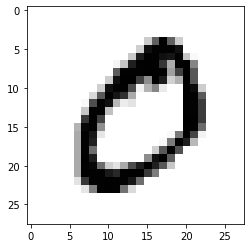

In [37]:
print('Image: ')
plt.imshow(x_train[1], cmap='gray_r')

In [38]:
# Output information:
print('Train output shape:',y_train.shape)
print('Test output shape:',y_test.shape)
print('Data type:',y_train.dtype)

Train output shape: (60000,)
Test output shape: (10000,)
Data type: uint8


In [39]:
print('Unique labels:',np.unique(y_train))
print('First 10 outputs:')
print(y_train[:10])

Unique labels: [0 1 2 3 4 5 6 7 8 9]
First 10 outputs:
[5 0 4 1 9 2 1 3 1 4]


<br>

**Preprocess the data**

In [40]:
# Normalize the data, flatten inputs, and convert datatype
x_train = x_train.reshape(60000, 784). \
                    astype('float32') / 255

x_test = x_test.reshape(10000, 784) \
                    .astype('float32') / 255

<br>

**TensorBoard logging**

In [41]:
## Load additional libraries needed ##
from datetime import datetime
from IPython.display import clear_output, Image, display, HTML
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

In [42]:
## Load TensorBoard notebook extension ##
%reload_ext tensorboard

## Clear any logs from previous runs ##
!rm -rf ./logs/

# place logs in a timestamped subdirectory and enable histogram computation with every epoch
log_dir = "logs/mnist/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Early stopping the patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

<br>

**Load standard NN components**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
# Initialize model constructor
model = Sequential()
# Add layers sequentially
model.add(Dense(300, activation=tf.nn.relu, \
                    input_shape=(784,)))

# Second..
model.add(Dense(200, activation=tf.nn.relu))

# Third..
model.add(Dense(100, activation=tf.nn.relu))

model.add(Dense(10, activation='softmax'))

In [46]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy']
             )

In [48]:
# train the model
NO_EPOCHS = 5
history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=NO_EPOCHS,
                    validation_split=0.2,
                    callbacks=[early_stop, tensorboard_callback])

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.2476 - accuracy: 0.9251 - val_loss: 0.1204 - val_accuracy: 0.9628
Epoch 2/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0997 - accuracy: 0.9692 - val_loss: 0.1259 - val_accuracy: 0.9630
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0701 - accuracy: 0.9793 - val_loss: 0.1157 - val_accuracy: 0.9686
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.1070 - val_accuracy: 0.9750
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.1253 - val_accuracy: 0.9733


<br>

**Generalization**

In [49]:
test_scores = model.evaluate(x_test, y_test, verbose=0)
#print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Test accuracy: 0.9735999703407288


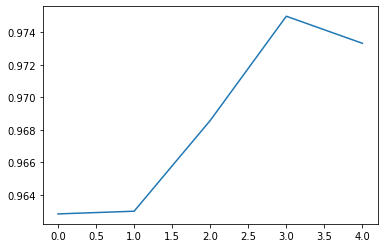

In [50]:
# plot accuracy
plt.plot(range(NO_EPOCHS),history.history['val_accuracy']);

<br>

**Visualize Model Using TensorFlow (with callbacks)**

In [52]:
# visualize logs
%tensorboard --logdir logs/mnist

Reusing TensorBoard on port 6008 (pid 24070), started 0:00:04 ago. (Use '!kill 24070' to kill it.)

___

## References and Additional Resources
___



<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="tf_logo_social.png" align="center" width="30%" padding="0px"><br>
    <br>
</div>

___

<br>

#### Install Python Development Environment

<br>

**Install/Update pip3**

https://pip.pypa.io/en/stable/installing/

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```

<br>

**Install/Update Python 3**

https://www.python.org/downloads/

```bash
    # TensorFlow requires Python 3.5-3.8 
    $ sudo apt-get update && sudo apt-get install python3-dev python3-pip python3-venv python-virtualenv
```

___

<br>

#### Creating a TensorFlow Virtual Environment (Recommended)

<br>

**Create virtual environment**

>On a terminal, or using magic keys, create a new virtual environment using a Python interpreter and creating a ```venv``` directory to hold it

```bash
    $ python3 -m venv venv
```

<br>

**Activate the virtual environment**

```bash
    $ source ./venv/bin/activate      # sh, bash, or zsh

    $ . ./venv/bin/activate.fish       # fish

    $ source ./venv/bin/activate.csh  # csh or tcsh
```

<br>

**Install packages within virtual environment**

When the virtual environment is active, your shell prompt is prefixed by ```(venv)```

> Step 1: reapeat 1.1.1 above, within ```(venv)```<br>

```bash
    # TensorFlow requires pip version >= 19.0
    $ pip install --upgrade pip 
```    

> Step 2: Install TensorFlow2

```bash
    (venv) $ pip install --upgrade tensorflow
```


> Step 3: Verify install

```bash
    (venv) $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

> Step 4: To exit virtual enviroment later

```bash
    (venv) $ pip deactivate
```

___

<br>

#### Install TensorFlow on Local Machine (Optional Setup)

<br>

**TensorFlow 2**

https://www.tensorflow.org/install/pip

```bash
    # Install using pip
    $ pip install --upgrade tensorflow 
```

<br>

**Verify Installation**

```bash
    $ python -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"
```

___

<br>

#### Run TensorFlow in a Container (Optional Setup)

[Tensorflow Docker images](https://www.tensorflow.org/install/docker) come pre-configured to run TensorFlow, and provide a virtual environment that is generally the easiest way to set up [GPU processing](https://www.tensorflow.org/install/gpu). To learn more about how to use [Docker](https://www.tensorflow.org/install/docker/) to separate your applications from your infrastructure, click [here](https://docs.docker.com/get-docker/).

<br>

___

<br>

#### Alternate Ways of Outputing MNIST digits

The following shows alternate ways of displaying a digit, as well as how to display more than one digit, and also include the label.

In [53]:
from sklearn.datasets import load_digits

# load data
digits = load_digits()

In [54]:
# creates list, each element is a list of indexed pairs
# [image[i], target[i]]
images_and_labels = list(zip(digits.images, digits.target))

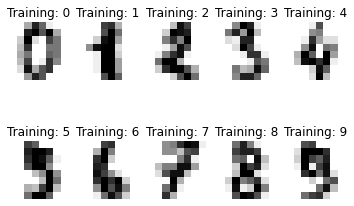

In [55]:
# preview of first 10 images
for index, (image, label) in enumerate (images_and_labels[:10]):
    plt.subplot(2, 5, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

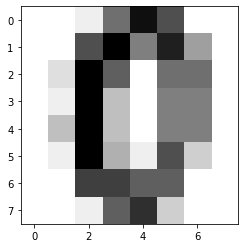

In [56]:
# close up of one particular digit
plt.imshow(np.reshape(digits.images[10], (8,8)), cmap=plt.cm.gray_r, interpolation='nearest')

___

<br>

#### Case 3 (Optional): Linear Regression on AutoMPG Dataset

<br>

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="LR_TF+Keras.png" align="center" width="30%" padding="10px"><br>
    Predicting Fuel Efficiency
</div>

<br>

In a [regression](https://en.wikipedia.org/wiki/Regression_analysis) problem, we aim to predict the output of a continuous variable -- e.g. $y$ -- subject to some input variable(s) -- e.g. $x_i, ~ i = 1, 2, \dots$ 

The following example uses the [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset to build a predictive model of the fuel efficiency of late 1970s and early 1980s automomibles.


<br>

**Install helpful packages**

In [57]:
# Uncomment and run if not yet installed
#!python -m pip install -U pip
#!python -m pip install -U matplotlib
#!pip install -q seaborn

# Gather some useful functions from tensorflow_docs
#!pip install -q git+https://github.com/tensorflow/docs

<br>

**General setup**

In [58]:
## import required libraries ##
# for declaring paths
import pathlib

# for plotting and data manipulation
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

# for modeling and visualizing NN
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.3.0


<br>

**Gather and clean data**

In [59]:
# download dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/ehch/.keras/datasets/auto-mpg.data'

In [60]:
# import data using pandas
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


<br>

**Clean the data**

In [61]:
# drop rows with missing values
dataset = dataset.dropna()

# Sanity check
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [62]:
# note that 'Origin' column is categorial and not numeric. 
dataset.Origin.unique()

array([1, 3, 2])

In [63]:
# convert quantitatie to nominal (discrete unordered categorical)
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


<br>

**Data visualization: Multi-panel scatter plot with linked brushing using [Altair](https://altair-viz.github.io/index.html)**

In [64]:
# create selection brush (Interactive visualization selection event)
brush = alt.selection(type='interval', resolve='global')

In [65]:
# build scatter plot with brushing 
baseScatter = alt.Chart(dataset).mark_point().encode(
    y='MPG',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray')),
).add_selection(
    brush
).properties(
    width=250,
    height=250
)

In [66]:
# display linked scatter plots
baseScatter.encode(x='Cylinders') | baseScatter.encode(x='Displacement') | baseScatter.encode(x='Horsepower') | baseScatter.encode(x='Acceleration') 

alt.HConcatChart(...)

<br>

**Convert categorical features values to one-hot encoding**

In [72]:
# we now want to convert categorical variables into indicators
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


<br>

**Split data into training and testing sets, and inspect data**

In [73]:
# split data
train = dataset.sample(frac=0.8,random_state=0)
test = dataset.drop(train.index)

In [74]:
# view statistical summary data
train_stats = train.describe()
train_stats

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.310510,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,7.728652,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,10.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.950000,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [75]:
# since MPG is response variable, we remove it to simplify stats
train_stats.pop("MPG")
train_stats

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,5.477707,195.318471,104.869427,2990.251592,15.559236,75.898089,0.178344,0.197452,0.624204
std,1.699788,104.331589,38.096214,843.898596,2.789230,3.675642,0.383413,0.398712,0.485101
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.500000,76.250000,2256.500000,13.800000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,94.500000,2822.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,8.000000,265.750000,128.000000,3608.000000,17.200000,79.000000,0.000000,0.000000,1.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [76]:
# columns <--> rows
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


<br>

**Split features from labels**

In [77]:
# remove Label from training and testing sets
train_labels = train.pop('MPG')
test_labels = test.pop('MPG')

___
**Note:** Looking at ```train_stats``` we see that the scale and range between feates is at times 3-orders of maginitude appart. We want to [normalize](https://www.usna.edu/Users/cs/taylor/courses/si486l/notes/regLinReg.html) our features so that our ranges are closer and so that it takes less time to train our model. Normalizing also makes the resulting model dependent on the choice of units used in the input.
___

<br>

**Normalize data**

In [78]:
# normalize data function uses statiistical summary data
def norm(x):
  return((x - train_stats['mean']) / train_stats['std'])

In [79]:
# normalize training and testing sets
normed_train_data = norm(train)
normed_test_data = norm(test)

<br>

**Build Model**

<br>

We will be building a [sequential model](https://youtu.be/CznICCPa63Q) with [one densely connected hidden layer](https://www.oreilly.com/library/view/tensorflow-for-deep/9781491980446/ch04.html) and [one ouput layer](http://deeplearning.stanford.edu/tutorial/supervised/MultiLayerNeuralNetworks/). A model with one hidden layer is generally referred to as a [shallow neural network](https://link.springer.com/chapter/10.1007/978-3-319-94463-0_2). We are building such a sequential model in order to preserve order in sequences, keep track of long-term dependencie, and maintain the relationships between variables -- while attempting to ensure that the modeling procedure is clearly presented and understood. 

In [80]:
# wrapper function for building sequential model using keras
def build_model():
  model = keras.Sequential([
    # dense hidden layer  
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    # dense output layer
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return(model)

In [81]:
# instantiate model
model = build_model()

<br>

**Inspect the model**

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [83]:
# try out the model with a sample
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.67810583],
       [-0.09583753],
       [-0.27330333],
       [ 0.11832139],
       [ 0.27432662],
       [ 0.04672064],
       [ 0.22661015],
       [-0.62842745],
       [-0.03823699],
       [-0.1169627 ]], dtype=float32)

<br>

**Train the model**

In [84]:
# 1 epoch equal to one forward and one backward pass on all training examples
EPOCHS = 1000

# fit model
history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:592.8535,  mae:23.1295,  mse:592.8535,  val_loss:610.0380,  val_mae:23.4642,  val_mse:610.0380,  
....................................................................................................
Epoch: 100, loss:8.1125,  mae:1.9557,  mse:8.1125,  val_loss:7.9529,  val_mae:2.1193,  val_mse:7.9529,  
....................................................................................................
Epoch: 200, loss:6.6484,  mae:1.8007,  mse:6.6484,  val_loss:7.8487,  val_mae:2.0963,  val_mse:7.8487,  
....................................................................................................
Epoch: 300, loss:6.1625,  mae:1.7349,  mse:6.1625,  val_loss:7.9986,  val_mae:2.1171,  val_mse:7.9986,  
....................................................................................................
Epoch: 400, loss:5.9714,  mae:1.6959,  mse:5.9714,  val_loss:8.1073,  val_mae:2.1519,  val_mse:8.1073,  
..............................................................

___

**Note:** the ```build_model()``` function can be split into its components and ran independently.

```python
# Build 1 layer sequential model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(10)
])

# Compile model
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'],
              )

# fit model, over 1000 epoch
model.fit(normed_train_data, 
          train_labels, 
          epochs=1000, 
          validation_split=0.2, 
          verbose=0, 
          callbacks=[tfdocs.modeling.EpochDots()])
          
```
___

<br>

**Visualize model's progress**

In [85]:
# extract stored history data
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,592.853455,23.129536,592.853455,610.037964,23.464245,610.037964,0
1,576.747681,22.781773,576.747681,595.403198,23.157305,595.403198,1
2,563.994690,22.506968,563.994690,582.101501,22.875534,582.101501,2
3,551.909485,22.244595,551.909485,569.177368,22.600035,569.177368,3
4,540.034912,21.985357,540.034912,556.297363,22.321615,556.297363,4


Text(0, 0.5, 'MAE [MPG]')

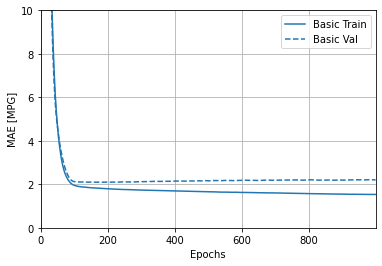

In [86]:
# plot history data - Mean Absolute Error over Epochs
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [$MPG^2$]')

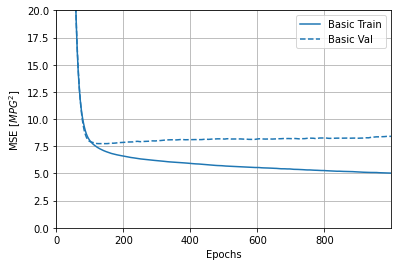

In [87]:
# plot history data - Mean Absolute Error over Epochs
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [$MPG^2$]')

___

**Note:** The $MSE\left[MPG^2\right]$ over Epoch plot displays little improvement, or even degradation in the validation error after about 100 epochs. We can implement an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then training automatically stops.

___

<br>

**Re-train model using early stopping and TensorBoard**

In [88]:
## Load additional libraries needed ##
from datetime import datetime
from IPython.display import clear_output, Image, display, HTML
import os
import pathlib

t = datetime.utcnow().strftime("%Y%m%d%H%M%S") 
log_dir = "tf_logs"
logd = "/tmp/{}/r{}/".format(log_dir, t)

<br>

**TensorBoard Callbacks**

In [89]:
## Load TensorBoard notebook extension ##
%reload_ext tensorboard

In [90]:
## Clear any logs from previous runs ##
!rm -rf ./logs/

In [91]:
# place logs in a timestamped subdirectory and enable histogram computation with every epoch
log_dir = "logs/mpg/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

<br>

**Build model**

In [92]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tensorboard_callback])

<br>

**Visualize Model Using TensorFlow (with callbacks)**# visualize logs
%tensorboard --logdir logs/mpg

In [93]:
# visualize logs
%tensorboard --logdir logs/mpg

<br>

**Generalization**

In [94]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.3209 - mae: 1.7511 - mse: 5.3209
Testing set Mean Abs Error:  1.75 MPG


<br>

**Make predictions**

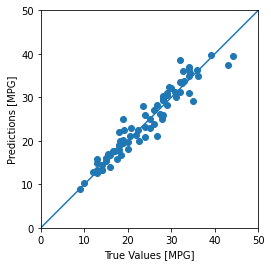

In [95]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

<br>

**Error distribution**

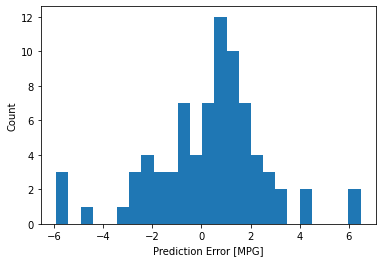

In [96]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

<br>

___

#### About: General Comments/Tips Regarding Neural Networks (NNs)

<br>

**(Vanilla) NN structure**

> * Any NN with one hidden layer can be a [Universal Function Approximator](https://en.wikipedia.org/wiki/Universal_approximation_theorem).<br>
> * The number of input nodes are equal to the number of features (sequential in Keras).<br>
> * The number of output nodes are equal to the number of classes (for classification tasks).<br>
> * A bias term is added to every layer that only feeds in a 1 -- doing so adds an extra degree of freedom for every functional input value to the next function.

**How deep should we go?**

> * We can overfit NN's, one way to combat that is by using dropout and regularization.<br>
> * Predictions will usually be better when we increase depth of network and widen it (increase the number of neurons in every layer).

**Activation Functions**

> * Classically the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) was used in the hidden layers (simplest function between 0 - 1).<br>
> * Nowadays it is more common to use the [ReLU (Rectified Linear Unit)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) -- much faster!<br>
> * For deep networks sigmoid might not want to converge at all -- known as the [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). It can be reduced using ReLU or by using [Batch Normalization](https://en.wikipedia.org/wiki/Batch_normalization).<br>
> * For the input layer we send in the (standardized) values.<br>
> * For the output layer we often use a [softmax](https://en.wikipedia.org/wiki/Softmax_function) function (multi-class classification) or a sigmoid function (binary classification). Softmax only works if the classes are mutually exclusive, i.e. we only try to label one pattern in every training example.

**Dealing with Overfitting**

> * Usually because our network has too many [degrees of freedom](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)) (neurons in the network).<br>
> * Can use L1 and L2 [regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization) on the [loss function](https://en.wikipedia.org/wiki/Loss_function).<br>
> * Can also use [Dilution](https://en.wikipedia.org/wiki/Dilution_(neural_networks)) to mitigate the effects of too many degrees of freedom.

___

## Additional Content and Sources

> [TensorFlow Tutorials](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)<br>
> [TensorFlow Guide](https://youtu.be/dcqPhpY7tWk) <br>
> [Deep Learning with Python by Francois Chollet](https://www.manning.com/books/deep-learning-with-python)
> [Introduction to TensorFlow by Andrew Ng and Kian Katanforoosh](https://cs230.stanford.edu/blog/tensorflow/)<br>
> [Deep Learning Illustrated by Jon Krohn, Grant Beyleveld, and Aglae Bassens](https://www.deeplearningillustrated.com/)<br>
> [Hands-On Introduction to TensorFlow 2.0 by Josh Gordon and Amit Patankar](https://youtu.be/Yyv-ng0_OTU)<br>
> [Getting Started with TensorFlow and Deep Learning by Josh Gordon](https://youtu.be/tYYVSEHq-io)

<div align="center" style="font-size:12px; font-family:FreeMono; font-weight: 100; font-stretch:ultra-condensed; line-height: 1.0; color:#2A2C2B">
    <img src="DataX_icon_wide_logo.png" align="center" width="50%" padding="0px"><br>
    <br>
</div>

___